## Q1: Machine precision

When talking about floating point, we discussed _machine epsilon_, $\epsilon$&mdash;this is the smallest number that when added to 1 is still different from 1.

We'll compute $\epsilon$ here:

  * Pick an initial guess for $\epsilon$ of `eps = 1`.  

  * Create a loop that checks whether `1 + eps` is different from `1`
  
  * Each loop iteration, cut the value of `eps` in half
  
What value of $\epsilon$ do you find?

In [1]:
eps = 1
while True:
    if 1 == 1+eps:
        print(eps)
        break
    else:
        eps = eps/2

1.1102230246251565e-16


## Q2: Iterations

### Part 1

To iterate over the tuples, where the _i_-th tuple contains the _i_-th elements of certain sequences, we can use `zip(*sequences)` function.

We will iterate over two lists, `names` and `age`, and print out the resulting tuples.

  * Start by initializing lists `names = ["Mary", "John", "Sarah"]` and `age = [21, 56, 98]`.
  
  * Iterate over the tuples containing a name and an age, the `zip(list1, list2)` function might be useful here.
  
  * Print out formatted strings of the type "*NAME is AGE years old*".
  

### Part 2

The function `enumerate(sequence)` returns tuples containing indices of objects in the sequence, and the objects. 

The `random` module provides tools for working with the random numbers. In particular, `random.randint(start, end)` generates a random number not smaller than `start`, and not bigger than `end`.

  * Generate a list of 10 random numbers from 0 to 9.
  
  * Using the `enumerate(random_list)` function, iterate over the tuples of random numbers and their indices, and print out *"Match: NUMBER and INDEX"* if the random number and its index in the list match.

In [2]:
names = ['Mary', 'John', 'Sarah']
age = [21, 56, 98]

for n,y in zip(names, age):
    print(f'{n} is {y} years old')

Mary is 21 years old
John is 56 years old
Sarah is 98 years old


In [3]:
import random

ints = [random.randint(a=0, b=9) for i in range(10)]
for i,n in enumerate(ints):
    if i == n:
        print(f'Match: {n} and {i}')

## Q3: Books

Here is a list of book titles (from http://thegreatestbooks.org).  Loop through the list and capitalize each word in each title. 

In [4]:
titles = ["don quixote", 
          "in search of lost time", 
          "ulysses", 
          "the odyssey", 
          "war and piece", 
          "moby dick", 
          "the divine comedy", 
          "hamlet", 
          "the adventures of huckleberry finn", 
          "the great gatsby"]
Titles = []
for el in titles:
    Titles += [el.title()]
print(Titles)

['Don Quixote', 'In Search Of Lost Time', 'Ulysses', 'The Odyssey', 'War And Piece', 'Moby Dick', 'The Divine Comedy', 'Hamlet', 'The Adventures Of Huckleberry Finn', 'The Great Gatsby']


## Q4: Word counts

Here's some text (the Gettysburg Address).  Our goal is to count how many times each word repeats.  We'll do a brute force method first, and then we'll look a ways to do it more efficiently (and compactly).

In [5]:
gettysburg_address = """
Four score and seven years ago our fathers brought forth on this continent, 
a new nation, conceived in Liberty, and dedicated to the proposition that 
all men are created equal.

Now we are engaged in a great civil war, testing whether that nation, or 
any nation so conceived and so dedicated, can long endure. We are met on
a great battle-field of that war. We have come to dedicate a portion of
that field, as a final resting place for those who here gave their lives
that that nation might live. It is altogether fitting and proper that we
should do this.

But, in a larger sense, we can not dedicate -- we can not consecrate -- we
can not hallow -- this ground. The brave men, living and dead, who struggled
here, have consecrated it, far above our poor power to add or detract.  The
world will little note, nor long remember what we say here, but it can never
forget what they did here. It is for us the living, rather, to be dedicated
here to the unfinished work which they who fought here have thus far so nobly
advanced. It is rather for us to be here dedicated to the great task remaining
before us -- that from these honored dead we take increased devotion to that
cause for which they gave the last full measure of devotion -- that we here
highly resolve that these dead shall not have died in vain -- that this
nation, under God, shall have a new birth of freedom -- and that government
of the people, by the people, for the people, shall not perish from the earth.
"""

In [48]:
import re
unique_words = {s.lower() for s in gettysburg_address.split() if s.isalpha()}
words_counter = {s:sum([1 for match in re.finditer(r'\b'+s+r'\b', gettysburg_address)]) for s in unique_words}

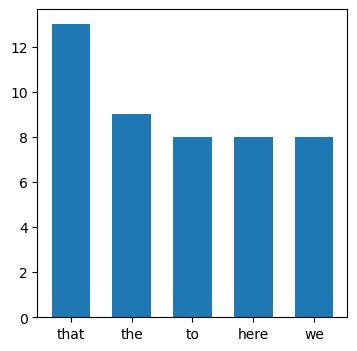

In [50]:
import matplotlib.pyplot as plt
num_words = 5

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

sorted_counter = sorted(words_counter.items(), key=lambda item : item[1], reverse=True)
ax.bar(np.linspace(1,num_words+1, num_words), [x[1] for x in sorted_counter[:num_words]])
ax.set_xticks(np.linspace(1,num_words+1, num_words), [x[0] for x in sorted_counter[:num_words]])

## Q5: Foxes and dogs

### Part 1. Short words

Let's practice functions.  Here's a simple function that takes a string and returns a list of all the 4 letter words.
Write a version of this function that takes a second argument, n, that is the word length we want to search for.

In [51]:
def four_letter_words(message, n):
    words = message.split()
    four_letters = [w for w in words if len(w) == n]
    return four_letters

In [54]:
message = "The quick brown fox jumps over the lazy dog"
print(four_letter_words(message, 4))

['over', 'lazy']


### Part 2: Panagrams

A _panagram_ is a sentence that includes all 26 letters of the alphabet, e.g., "_The quick brown fox jumps over the lazy dog_."

Write a function that takes as an argument a sentence and returns `True` or `False`, indicating whether the sentence is a panagram.

In [58]:
def isPanagram(message):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    for s in alphabet:
        if s not in list(message.lower()):
            return False
    return True

In [59]:
isPanagram(message)

True

## Q6: Catch the error

We want to safely convert a string into a float, int, or leave it as a string, depending on its contents.  As we've already seen, python provides `float()` and `int()` functions for this. Notice that an int can be converted to a float, but if you convert a float to an int, you risk losing significant digits.  A string cannot be converted to either.

### Your task

Write a function, `convert_type(a)` that takes a string `a`, and converts it to a float if it is a number with a decimal point, an int if it is an integer, or leaves it as a string otherwise, and returns the result.  You'll want to use exceptions to prevent the code from aborting.

In [4]:
def convert_type(a):
    try: b = float(a)
    except ValueError:
        print(f'{a} cannot be converted to float')
        return a
    if b-int(b) == 0:
        print(f'{a} can be converted to int')
        return int(b)
    else:
        print(f'{a} can be converted to float')
        return b        

## Q7 / Q10: Tic-tac-toe

Here we'll write a simple tic-tac-toe game that 2 players can play.  

In [3]:
class TicTacToe:
    """Tic-Tac-Toe class. This class incorporayes all the functions 
    to play the famous tic-tac-toe game between two players"""

    def __init__(self):
        """Class constructor. Initialize the basic elements"""
        self.play = {f's{i}':"" for i in range(1,10)}
        self.board = """
 {s1:^3} | {s2:^3} | {s3:^3}       1  2  3
-----+-----+-----
 {s4:^3} | {s5:^3} | {s6:^3}       4  5  6
-----+-----+-----      
 {s7:^3} | {s8:^3} | {s9:^3}       7  8  9       
                         
"""

    def show_board(self):
        """Display the current state of the board"""
        print(self.board.format(**self.play))


    def get_move(self, n, XO):
        """Ask the current player, n, to make a move -- make sure the square was not 
        already played.  XO is a string of the character (X or O) we will place in
        the desired square """
        valid_move = False
        while not valid_move:
            idx = input(f'Player {n}, enter your move (1-9)')
            if self.play[f's{idx}'] == "":
                valid_move = True
            else:
                print(f'Invalid move: {self.play[f"s{idx}"]}')
                
        self.play[f's{idx}'] = XO


    def check_winner(self):
        """Check for winning conditions. This function checks the board looking for three identical symbols
        on the same row, column or diagonal"""
        win = False
        winner = None
        symb2play = lambda s : 1 if(s == 'X') else 2
        for i in [1, 2, 3]:
            if self.play[f's{i}'] == self.play[f's{i+3}'] == self.play[f's{i+6}'] != '':
                win = True
                winner = symb2play(self.play[f's{i}'])
                
        for i in [1, 4, 7]:
            if self.play[f's{i}'] == self.play[f's{i+1}'] == self.play[f's{i+2}'] != '':
                win = True
                winner = symb2play(self.play[f's{i}'])
                
        if self.play[f's{1}'] == self.play[f's{5}'] == self.play[f's{9}'] != '':
                win = True
                winner = symb2play(self.play[f's{5}'])
            
        if self.play[f's{3}'] == self.play[f's{5}'] == self.play[f's{7}'] != '':
                win = True
                winner = symb2play(self.play[f's{5}'])
            
        return win, winner     


    def play_game(self):
        """Play a game of tic-tac-toe """
        rand_start = input('Start the game with a random player: y/n')
        if rand_start == 'y':
            player = {1,2}.pop()
        else:
            player = input('Insert starting player (1 or 2): ')
            if player not in ['1', '2']: 
                player = input('Please insert a valid starting player (1 or 2): ')
        print("""\n 
        ***************
        * Tic-Tac-Toe *
        ***************
        \n""")

        self.show_board()
    
        while '' in self.play.values():
            player = ({1,2} - {player}).pop()
            if player == 1: XO = 'X'
            else: XO = 'O'
            self.get_move(player, XO)
            self.show_board()
            win, winner = self.check_winner()
            if win:
                return f'Congrats player {winner}, you are the winner! '
        print('Draw')

In [ ]:
game = TicTacToe()
game.play_game()

## Q8: Shopping cart

Let's write a simple shopping cart class -- this will hold items that you intend to purchase as well as the amount, etc.  And allow you to add / remove items, get a subtotal, etc.

We'll use two classes: `Item` will be a single item and `ShoppingCart` will be the collection of items you wish to purchase.

First, our store needs an inventory -- here's what we have for sale:

In [25]:
INVENTORY_TEXT = """
apple, 0.60
banana, 0.20
grapefruit, 0.75
grapes, 1.99
kiwi, 0.50
lemon, 0.20
lime, 0.25
mango, 1.50
papaya, 2.95
pineapple, 3.50
blueberries, 1.99
blackberries, 2.50
peach, 0.50
plum, 0.33
clementine, 0.25
cantaloupe, 3.25
pear, 1.25
quince, 0.45
orange, 0.60
"""

# this will be a global -- convention is all caps
INVENTORY = {}
for line in INVENTORY_TEXT.splitlines():
    if line.strip() == "":
        continue
    item, price = line.split(",")
    INVENTORY[item] = float(price)

INVENTORY

{'apple': 0.6,
 'banana': 0.2,
 'grapefruit': 0.75,
 'grapes': 1.99,
 'kiwi': 0.5,
 'lemon': 0.2,
 'lime': 0.25,
 'mango': 1.5,
 'papaya': 2.95,
 'pineapple': 3.5,
 'blueberries': 1.99,
 'blackberries': 2.5,
 'peach': 0.5,
 'plum': 0.33,
 'clementine': 0.25,
 'cantaloupe': 3.25,
 'pear': 1.25,
 'quince': 0.45,
 'orange': 0.6}

### Item

Let's write an item class now -- we want it to hold the name and quantity.  

You should have the following features:

* The name should be something in our inventory

* Our shopping cart will include a list of all the items we want to buy, so we want to be able to check for duplicates.  Implement the equal test, `==`, using `__eq__`

* We'll want to consolidate duplicates, so implement the `+` operator, using `__add__` so we can add items together in our shopping cart.  Note, add should raise a ValueError if you try to add two `Items` that don't have the same name.

Here's a start:

In [26]:
class Item:
    """An item to buy """
    
    def __init__(self, name, quantity=1):
        """Keep track of an item that is in our inventory"""
        if name not in INVENTORY:
            raise ValueError('Invalid item name')
        self.name = name
        self.quantity = quantity
        
    def __repr__(self):
        return f'{self.name}: {self.quantity}'
        
    def __eq__(self, other):
        """check if the items have the same name"""
        return self.name == other.name
    
    def __add__(self, other):
        """add two items together if they are the same type"""
        if self.name == other.name:
            return Item(self.name, self.quantity + other.quantity)
        else:
            raise ValueError("Names don't match")

### Shopping cart

Now we want to create a shopping cart.  The main thing it will do is hold a list of items.

In [50]:
class ShoppingCart:
    
    def __init__(self):
        # the list of items we control
        self.items = []
        
    def subtotal(self):
        """Return a subtotal of our items """
        tot = 0
        for item in self.items:
            tot += item.quantity * INVENTORY[item.name]
        return tot

    def add(self, name, quantity):
        """Add an item to our cart -- the an item of the same name already
        exists, then increment the quantity.  Otherwise, add a new item
        to the cart with the desired quantity."""
        item = Item(name, quantity)
        if item in self.items:
            self.items[self.items.index(item)] += item
        else:
            self.items.append(item)
            
    def remove(self, name):
        """Remove all of item name from the cart """
        item = Item(name)
        if item in self.items:
            self.items.remove(item)
        
    def report(self):
        """Print a summary of the cart """
        for item in self.items:
            print(f'{item.name} : {item.quantity}')

## Q9: Poker odds

Use the deck of cards class from the notebook we worked through class to write a _Monte Carlo_ code that plays a lot of hands of straight poker (like 100,000).  Count how many of these hands has a particular poker hand (like 3-of-a-kind).  The ratio of # of hands with 3-of-a-kind to total hands is an approximation to the odds of getting a 3-of-a-kind in poker.

### Bonus: 
Just to practice modules, write that into a `.py` file to allow you to import and reuse them here.

In [50]:
from deckOfCards import *
import numpy as np
import matplotlib.pyplot as plt

def checkPoints(hands):
    """Check for points in a hand of cards. 
    Possible points: pair, two pair, three of a kind (trips), straight, flush, full house, four of a kind (quads), straight flush, royal flush
    Suits = spade (1), heart (2), diamond (3), club (4)
    """
    points = {'pair':0, 'two pair':0, 'three of a kind':0, 'straight':0, 'flush':0, 'full house':0, 'four of a kind':0,\
              'straight flush':0, 'royal flush':0}
    
    for hand in hands:
        ranks = [card.rank for card in hand]
        suits = [card.suit for card in hand]
    
        rank_counts = {f'{val}':ranks.count(val) for val in list(set(ranks))}
        suit_counts = {f'{val}':suits.count(val) for val in list(set(suits))}

        if 5 in suit_counts.values():
            if sorted(ranks) == [10,11,12,13,14]:
                points['royal flush'] += 1
            elif sorted(ranks)[-1] == sorted(ranks)[0]+4 or sorted(ranks) == [2,3,4,5,14]:
                points['straight flush'] += 1
            else:
                points['flush'] += 1

        if sorted(ranks)[-1] == sorted(ranks)[0]+4 or sorted(ranks) == [2,3,4,5,14]:
            points['straight'] += 1

        if 4 in rank_counts.values():
            points['four of a kind'] += 1
        elif 3 in rank_counts.values():
            if 2 in rank_counts.values():
                points['full house'] += 1
            else:
                points['three of a kind'] += 1
        elif 2 in rank_counts.values():
            if list(rank_counts.values()).count(2) == 2:
                points['two pair'] += 1
            else:
                points['pair'] += 1

    return points

In [51]:
manyHands = []

for i in range(100000):
    mydeck = Deck()
    mydeck.shuffle()
    manyHands += [mydeck.get_cards(5)]

points = checkPoints(manyHands)

Text(0, 0.5, 'log(P)')

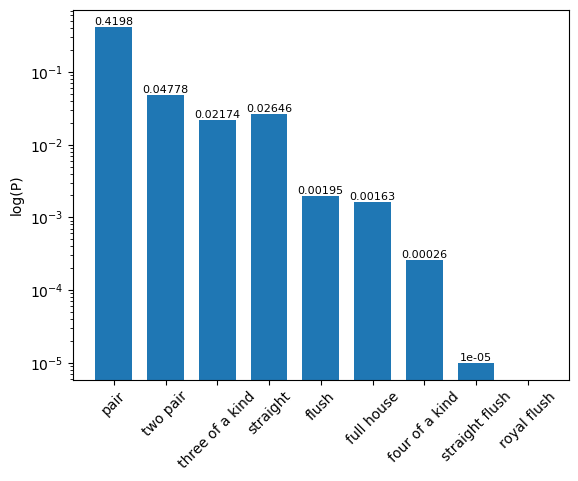

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)

plot = ax.bar(np.linspace(1,len(points.keys())+1, len(points.keys())), [n/len(manyHands) for n in list(points.values())], log=True)
ax.bar_label(plot, [n/len(manyHands) for n in list(points.values())], size=8)
ax.set_xticks(np.linspace(1,len(points.keys())+1, len(points.keys())), [x for x in list(points.keys())])
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel('log(P)')

## Q11: Rock-Paper-Scissors

Implement a set of games of rock-paper-scissors against the computer.  

  * Ask for input from the user ("rock", "paper", or "scissors") and the randomly select one of these for the computer's play.
  * Announce who won.
  * Keep playing until a player says that they no longer want to play.
  * When all games are done, print out how many games were won by the player and by the computer 

In [65]:
print("""
***********************
* Rock Paper Scissors *
***********************
""")
winner = {'player':0, 'computer':0, 'draw':0}
play = True
while play:
    player = input('Rock (r), paper (p) or scissors (s)?')
    if player not in ['r', 'p', 's']:
        print('Invalid input')
        player = input('Rock (r), paper (p) or scissors (s)?')
    bot = {'r', 'p', 's'}.pop()

    print(f'Player: {player} VS computer: {bot}')

    if player == bot:
        print('draw')
        winner['draw'] += 1
    elif (player == 'r' and bot == 'p') or (player == 'p' and bot == 's') or (player == 's' and bot == 'r'):
        print('Computer wins')
        winner['computer'] += 1
    else:
        print('Player wins')
        winner['player'] += 1

    playAgain = lambda x : True if(x == 'y') else False
    play = playAgain(input('Play again (y/n)?'))

print(f"""\n
______________________________________ \n
Computer won {winner['computer'] times \n
player won {winner['player'] times \n
draw happens {winner['draw'] times}
""")


***********************
* Rock Paper Scissors *
***********************



Rock (r), paper (p) or scissors (s)? s


Player: s VS computer: p
Player wins


Play again (y/n)? y
Rock (r), paper (p) or scissors (s)? r


Player: r VS computer: p
Computer wins


Play again (y/n)? y
Rock (r), paper (p) or scissors (s)? p


Player: p VS computer: p
draw


Play again (y/n)? y
Rock (r), paper (p) or scissors (s)? r


Player: r VS computer: p
Computer wins


Play again (y/n)? y
Rock (r), paper (p) or scissors (s)? s


Player: s VS computer: p
Player wins


Play again (y/n)? n


## Q12: Pascal's triangle

Pascal's triangle is created such that each layer has 1 more element than the previous, with `1`s on the side and in the interior, the numbers are the sum of the two above it, e.g.,:
```
            1
          1   1
        1   2   1
      1   3   3   1
    1   4   6   4   1
  1   5   10  10  5   1
```

1. Write a function to return the first `n` rows of Pascal's triangle.  The return should be a list of length `n`, with each element itself a list containing the numbers for that row.
2. Write a function to print out Pascal's triangle with proper formatting, so the numbers in each row are centered between the ones in the row above

In [76]:
class PascalTriangle:
    """General class for Pascal's triangle of order n"""

    def __init__(self):
        """Initialize the triangle"""
        self.ptriang = [[1]]

    def eval(self, n):
        add_row = lambda x : x + [[1]+[i+j for i,j in zip(x[-1][1:], x[-1][:-1])]+[1]]
        self.ptriang = [[1]]
        for i in range(n):
            self.ptriang = add_row(self.ptriang)

    def show(self):
        output = ''
        max_len = len('   '.join(str(el) for el in self.ptriang[-1]))
        for row in self.ptriang:
            new_row = '   '.join(str(el) for el in row)
            output += ' '*((max_len - len(new_row))//2) + new_row + ' '*((max_len - len(new_row))//2) + '\n'
        print(output)

In [78]:
ptri = PascalTriangle()
ptri.eval(10)
ptri.show()

                           1                           
                         1   1                         
                       1   2   1                       
                     1   3   3   1                     
                   1   4   6   4   1                   
                1   5   10   10   5   1                
             1   6   15   20   15   6   1             
           1   7   21   35   35   21   7   1           
        1   8   28   56   70   56   28   8   1        
     1   9   36   84   126   126   84   36   9   1     
1   10   45   120   210   252   210   120   45   10   1



## Q13: Calendar events

We want to keep a schedule of events.  We will do this by creating a class called `Day`.  It is sketched out below.  A `Day` holds a list of events and has methods that allow you to add an delete events.  Our events will be instances of a class `Event`, which holds the time, location, and description of the event.

Finally, we can keep track of a list of all the `Day`s for which we have events to make our schedule.

Fill in these classes and write some code to demonstrate their use:

  * Create a full week of days in your calendar
  * Add an event every day at noon called "lunch"
  * Randomly add some other events to fill out your calendar
  * Write some code that tells you the start time of your first meeting and the end time of your last meeting (this is the length of your work day)

In [251]:
import datetime as dt

class Day:
    """a single day keeping track of the events scheduled. Date format dd/mm/yyyy"""
    def __init__(self, date):
        # store the month, day, and year as data in the class
        self.date = dt.date(year=int(date.split('/')[2]), month=int(date.split('/')[1]), day=int(date.split('/')[0]))
        # keep track of the events
        self.events = []

    def __str__(self):
        return self.date.strftime('%a %d %b %Y')
    
    def add_event(self, name, time=None, location=None, duration=None):
        new_event = Event(self.date, name, time=time, location=location, duration=duration)
        if time is not None:
            for event in self.events:
                if event.time < new_event.time < event.time+event.duration:
                    print(f'''Warning! You have overlapping events:\n{new_event}\n{event}''')
        self.events.append(new_event)
        self.events.sort(key=lambda x : x.time)

    def list_events(self):
        print('\033[1m' + self.date.strftime('%a %d %b %Y') + '\033[0m')
        for event in self.events:
            print('\u23f5 ', event)
    
    def delete_event(self, name):
        for event in self.events:
            if event.name == name:
                self.events.remove(event)
                pass

    def workingday(self):
        print(f'''First event: {self.events[0]}\nLast event: {self.events[-1]}''')
    
    
class Event:
    """a single event in our calendar"""
    def __init__(self, date, name, time='9:00', location=None, duration='1:00'):
        self.name = name
        self.time = dt.datetime.combine(date, dt.time(hour=int(time.split(':')[0]), minute=int(time.split(':')[1])))
        self.location = location
        self.duration = dt.timedelta(hours=int(duration.split(':')[0]), minutes=int(duration.split(':')[1]))


    def __str__(self):
        return f'[{self.time.time()} | {(self.time+self.duration).time()}]: ' \
        f'''{self.name} {f'({self.location})' if self.location is not None else ""}'''

In [252]:
mon = Day('15/01/2024')
print(mon)

Mon 15 Jan 2024


In [253]:
mon.add_event('lunch', time='12:30', duration='0:30', location='Pan cafe')
mon.add_event('meeting', time='10:30', duration='1:00')
mon.add_event('meeting2', time='11:00', duration='00:45')

Warning! You have overlapping events:
[11:00:00 | 11:45:00]: meeting2 
[10:30:00 | 11:30:00]: meeting 


In [254]:
mon.list_events()

Mon 15 Jan 2024
⏵  [10:30:00 | 11:30:00]: meeting 
⏵  [11:00:00 | 11:45:00]: meeting2 
⏵  [12:30:00 | 13:00:00]: lunch (Pan cafe)


In [255]:
mon.delete_event('meeting2')
mon.list_events()

Mon 15 Jan 2024
⏵  [10:30:00 | 11:30:00]: meeting 
⏵  [12:30:00 | 13:00:00]: lunch (Pan cafe)


In [256]:
mon.workingday()

First event: [10:30:00 | 11:30:00]: meeting 
Last event: [12:30:00 | 13:00:00]: lunch (Pan cafe)
